In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/modified time of occurence.csv")

In [ ]:
data.head()

,States/UTs,earlymorning,latemorning,earlyafternoon,lateafternoon,earlyevening,lateevening,midnight,twilight,Unknown
0,Andhra Pradesh,2453,3069,3437,3919,4633,2188,947,1300,46
1,Arunachal Pradesh,40,46,22,34,26,23,25,11,10
2,Assam,1068,1536,1299,1464,1284,747,395,501,56
3,Bihar,1859,1791,1261,1437,1288,462,165,1744,0
4,Chhattisgarh,1426,2063,2238,2679,3085,1439,454,515,0


In [ ]:
data.isnull().sum()

States/UTs        0
earlymorning      0
latemorning       0
earlyafternoon    0
lateafternoon     0
earlyevening      0
lateevening       0
midnight          0
twilight          0
Unknown           0
dtype: int64

In [ ]:
data.shape

(36, 10)

In [ ]:
data.describe()

,earlymorning,latemorning,earlyafternoon,lateafternoon,earlyevening,lateevening,midnight,twilight,Unknown
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,1365.694444,1854.638889,1878.416667,2180.916667,2401.444444,1343.611111,654.805556,699.638889,93.111111
std,1791.566781,2411.684914,2457.683083,2896.498244,3317.503463,1827.096295,862.991039,922.591882,244.190883
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,53.500000,45.500000,51.750000,70.000000,70.250000,57.000000,22.250000,14.000000,0.000000
50%,659.000000,789.500000,737.500000,844.500000,884.000000,441.000000,277.500000,401.000000,0.500000
75%,1951.000000,2659.500000,2738.000000,3155.500000,3796.750000,1979.500000,944.750000,1029.000000,59.250000
max,6768.000000,8190.000000,8662.000000,9971.000000,13143.000000,6258.000000,3516.000000,4064.000000,1323.000000


In [ ]:
#outliers

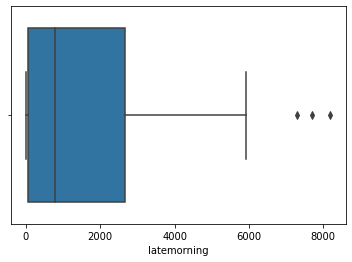

In [ ]:
sns.boxplot(x='latemorning',data=data)

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

earlymorning      1897.50
latemorning       2614.00
earlyafternoon    2686.25
lateafternoon     3085.50
earlyevening      3726.50
lateevening       1922.50
midnight           922.50
twilight          1015.00
Unknown             59.25
dtype: float64


In [ ]:
print(data < Q1 - 1.5 * IQR)

    States/UTs  Unknown  earlyafternoon  ...  latemorning  midnight  twilight
0        False    False           False  ...        False     False     False
1        False    False           False  ...        False     False     False
2        False    False           False  ...        False     False     False
3        False    False           False  ...        False     False     False
4        False    False           False  ...        False     False     False
5        False    False           False  ...        False     False     False
6        False    False           False  ...        False     False     False
7        False    False           False  ...        False     False     False
8        False    False           False  ...        False     False     False
9        False    False           False  ...        False     False     False
10       False    False           False  ...        False     False     False
11       False    False           False  ...        False     Fa

In [ ]:
#feature engineering

In [ ]:
data.head()

,States/UTs,earlymorning,latemorning,earlyafternoon,lateafternoon,earlyevening,lateevening,midnight,twilight,Unknown
0,Andhra Pradesh,2453,3069,3437,3919,4633,2188,947,1300,46
1,Arunachal Pradesh,40,46,22,34,26,23,25,11,10
2,Assam,1068,1536,1299,1464,1284,747,395,501,56
3,Bihar,1859,1791,1261,1437,1288,462,165,1744,0
4,Chhattisgarh,1426,2063,2238,2679,3085,1439,454,515,0


In [ ]:
data.loc[(data.earlymorning < 2000), 'emorning'] = 0
data.loc[(data.earlymorning > 2000), 'emorning'] = 1
data.loc[(data.earlymorning > 4000), 'emorning'] = 2
data.loc[(data.earlymorning > 6000), 'emorning'] = 3

In [ ]:
print(data)

           States/UTs  earlymorning  latemorning  ...  twilight  Unknown  emorning
0      Andhra Pradesh          2453         3069  ...      1300       46       1.0
1   Arunachal Pradesh            40           46  ...        11       10       0.0
2               Assam          1068         1536  ...       501       56       0.0
3               Bihar          1859         1791  ...      1744        0       0.0
4        Chhattisgarh          1426         2063  ...       515        0       0.0
5                 Goa           300          506  ...       151        0       0.0
6             Gujarat          1791         2523  ...       819       22       0.0
7             Haryana          1173         1359  ...       912      447       0.0
8    Himachal Pradesh           235          419  ...        99        0       0.0
9     Jammu & Kashmir           514         1097  ...       167        0       0.0
10          Jharkhand           671          853  ...       394      141       0.0
11  

In [ ]:
data.head()

,States/UTs,earlymorning,latemorning,earlyafternoon,lateafternoon,earlyevening,lateevening,midnight,twilight,Unknown,emorning
0,Andhra Pradesh,2453,3069,3437,3919,4633,2188,947,1300,46,1.0
1,Arunachal Pradesh,40,46,22,34,26,23,25,11,10,0.0
2,Assam,1068,1536,1299,1464,1284,747,395,501,56,0.0
3,Bihar,1859,1791,1261,1437,1288,462,165,1744,0,0.0
4,Chhattisgarh,1426,2063,2238,2679,3085,1439,454,515,0,0.0


In [ ]:
data.latemorning.describe()

count      36.000000
mean     1854.638889
std      2411.684914
min         0.000000
25%        45.500000
50%       789.500000
75%      2659.500000
max      8190.000000
Name: latemorning, dtype: float64

In [ ]:
data.loc[(data.latemorning < 2000), 'lmorning'] = 0
data.loc[(data.latemorning > 2000), 'lmorning'] = 1
data.loc[(data.latemorning > 4000), 'lmorning'] = 2
data.loc[(data.latemorning > 6000), 'lmorning'] = 3
data.loc[(data.latemorning > 8000), 'lmorning'] = 4

In [ ]:
data.earlyafternoon.describe()

count      36.000000
mean     1878.416667
std      2457.683083
min         0.000000
25%        51.750000
50%       737.500000
75%      2738.000000
max      8662.000000
Name: earlyafternoon, dtype: float64

In [ ]:
data.loc[(data.earlyafternoon < 2000), 'eafternoon'] = 0
data.loc[(data.earlyafternoon > 2000), 'eafternoon'] = 1
data.loc[(data.earlyafternoon > 4000), 'eafternoon'] = 2
data.loc[(data.earlyafternoon > 6000), 'eafternoon'] = 3
data.loc[(data.earlyafternoon > 8000), 'eafternoon'] = 4

In [ ]:
data.lateafternoon.describe()

count      36.000000
mean     2180.916667
std      2896.498244
min         0.000000
25%        70.000000
50%       844.500000
75%      3155.500000
max      9971.000000
Name: lateafternoon, dtype: float64

In [ ]:
data.loc[(data.lateafternoon < 2000), 'lafternoon'] = 0
data.loc[(data.lateafternoon > 2000), 'lafternoon'] = 1
data.loc[(data.lateafternoon > 4000), 'lafternoon'] = 2
data.loc[(data.lateafternoon > 6000), 'lafternoon'] = 3
data.loc[(data.lateafternoon > 8000), 'lafternoon'] = 4

In [ ]:
data.earlyevening.describe()

count       36.000000
mean      2401.444444
std       3317.503463
min          1.000000
25%         70.250000
50%        884.000000
75%       3796.750000
max      13143.000000
Name: earlyevening, dtype: float64

In [ ]:
data.loc[(data.earlyevening < 2500), 'eevening'] = 0
data.loc[(data.earlyevening > 2500), 'eevening'] = 1
data.loc[(data.earlyevening > 5000), 'eevening'] = 2
data.loc[(data.earlyevening > 7500), 'eevening'] = 3
data.loc[(data.earlyevening > 10000), 'eevening'] = 4

In [ ]:
data.lateevening.describe()

count      36.000000
mean     1343.611111
std      1827.096295
min         0.000000
25%        57.000000
50%       441.000000
75%      1979.500000
max      6258.000000
Name: lateevening, dtype: float64

In [ ]:
data.loc[(data.lateevening < 1500), 'levening'] = 0
data.loc[(data.lateevening > 1500), 'levening'] = 1
data.loc[(data.lateevening > 3000), 'levening'] = 2
data.loc[(data.lateevening > 4500), 'levening'] = 3

In [ ]:
data.midnight.describe()

count      36.000000
mean      654.805556
std       862.991039
min         0.000000
25%        22.250000
50%       277.500000
75%       944.750000
max      3516.000000
Name: midnight, dtype: float64

In [ ]:
data.loc[(data.midnight < 1000), 'mnight'] = 0
data.loc[(data.midnight > 1000), 'mnight'] = 1
data.loc[(data.midnight > 2000), 'mnight'] = 2
data.loc[(data.midnight > 3000), 'mnight'] = 3

In [ ]:
data.twilight.describe()

count      36.000000
mean      699.638889
std       922.591882
min         0.000000
25%        14.000000
50%       401.000000
75%      1029.000000
max      4064.000000
Name: twilight, dtype: float64

In [ ]:
data.loc[(data.twilight < 1500), 'tlight'] = 0
data.loc[(data.twilight > 1500), 'tlight'] = 1
data.loc[(data.twilight > 3000), 'tlight'] = 2
data.loc[(data.twilight > 4500), 'tlight'] = 3

In [ ]:
data.Unknown.describe()

count      36.000000
mean       93.111111
std       244.190883
min         0.000000
25%         0.000000
50%         0.500000
75%        59.250000
max      1323.000000
Name: Unknown, dtype: float64

In [ ]:
data.loc[(data.Unknown < 250), 'unknown'] = 0
data.loc[(data.Unknown > 250), 'unknown'] = 1
data.loc[(data.Unknown > 500), 'unknown'] = 2
data.loc[(data.Unknown > 1000), 'unknown'] = 3

In [ ]:
data_new = data.drop(columns=['earlymorning','latemorning','earlyafternoon','lateafternoon','earlyevening','lateevening','midnight','twilight','Unknown'])

In [ ]:
data_new.head()

,States/UTs,emorning,lmorning,eafternoon,lafternoon,eevening,levening,mnight,tlight,unknown
0,Andhra Pradesh,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Arunachal Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Assam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bihar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Chhattisgarh,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


print(data_new)

    index         States/UTs  emorning  lmorning  eafternoon  lafternoon  \
0       0     Andhra Pradesh       1.0       1.0         1.0         1.0   
1       1  Arunachal Pradesh       0.0       0.0         0.0         0.0   
2       2              Assam       0.0       0.0         0.0         0.0   
3       3              Bihar       0.0       0.0         0.0         0.0   
4       4       Chhattisgarh       0.0       1.0         1.0         1.0   
5       5                Goa       0.0       0.0         0.0         0.0   
6       6            Gujarat       0.0       1.0         1.0         1.0   
7       7            Haryana       0.0       0.0         0.0         0.0   
8       8   Himachal Pradesh       0.0       0.0         0.0         0.0   
9       9    Jammu & Kashmir       0.0       0.0         0.0         0.0   
10     10          Jharkhand       0.0       0.0         0.0         0.0   
11     11          Karnataka       2.0       2.0         3.0         3.0   
12     12   

In [ ]:
data_new = data_new.reset_index()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [ ]:
data_new = data_new.dropna()

In [ ]:
data_new.shape

(36, 11)

In [ ]:
#naive bayes

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
data = '/content/modified time of occurence.csv'

df = pd.read_csv ('/content/modified time of occurence.csv')

In [ ]:
df.shape

(36, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   States/UTs      36 non-null     object
 1   earlymorning    36 non-null     int64 
 2   latemorning     36 non-null     int64 
 3   earlyafternoon  36 non-null     int64 
 4   lateafternoon   36 non-null     int64 
 5   earlyevening    36 non-null     int64 
 6   lateevening     36 non-null     int64 
 7   midnight        36 non-null     int64 
 8   twilight        36 non-null     int64 
 9   Unknown         36 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 2.9+ KB


In [ ]:
#categorical variables

In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 1 categorical variables

The categorical variables are :

 ['States/UTs']


In [ ]:
df[categorical].head()

,States/UTs
0,Andhra Pradesh
1,Arunachal Pradesh
2,Assam
3,Bihar
4,Chhattisgarh


In [ ]:
df[categorical].isnull().sum()

States/UTs    0
dtype: int64

In [ ]:
for var in categorical: 
    
    print(df[var].value_counts())

Jammu & Kashmir      1
Goa                  1
Daman & Diu          1
Himachal Pradesh     1
Mizoram              1
Orissa               1
Puducherry           1
Rajasthan            1
Karnataka            1
Assam                1
Bihar                1
Chandigarh           1
Nagaland             1
Telangana            1
Maharashtra          1
D & N Haveli         1
Andhra Pradesh       1
Tripura              1
Uttarakhand          1
Madhya Pradesh       1
Lakshadweep          1
Gujarat              1
Arunachal Pradesh    1
Sikkim               1
Haryana              1
Delhi                1
Chhattisgarh         1
Manipur              1
Punjab               1
Kerala               1
Jharkhand            1
Tamil Nadu           1
A & N Islands        1
Uttar Pradesh        1
Meghalaya            1
West Bengal          1
Name: States/UTs, dtype: int64


In [ ]:
for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

Jammu & Kashmir      0.027778
Goa                  0.027778
Daman & Diu          0.027778
Himachal Pradesh     0.027778
Mizoram              0.027778
Orissa               0.027778
Puducherry           0.027778
Rajasthan            0.027778
Karnataka            0.027778
Assam                0.027778
Bihar                0.027778
Chandigarh           0.027778
Nagaland             0.027778
Telangana            0.027778
Maharashtra          0.027778
D & N Haveli         0.027778
Andhra Pradesh       0.027778
Tripura              0.027778
Uttarakhand          0.027778
Madhya Pradesh       0.027778
Lakshadweep          0.027778
Gujarat              0.027778
Arunachal Pradesh    0.027778
Sikkim               0.027778
Haryana              0.027778
Delhi                0.027778
Chhattisgarh         0.027778
Manipur              0.027778
Punjab               0.027778
Kerala               0.027778
Jharkhand            0.027778
Tamil Nadu           0.027778
A & N Islands        0.027778
Uttar Prad

In [ ]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 9 numerical variables

The numerical variables are : ['earlymorning', 'latemorning', 'earlyafternoon', 'lateafternoon', 'earlyevening', 'lateevening', 'midnight', 'twilight', 'Unknown']


In [ ]:
df.head()

,States/UTs,earlymorning,latemorning,earlyafternoon,lateafternoon,earlyevening,lateevening,midnight,twilight,Unknown
0,Andhra Pradesh,2453,3069,3437,3919,4633,2188,947,1300,46
1,Arunachal Pradesh,40,46,22,34,26,23,25,11,10
2,Assam,1068,1536,1299,1464,1284,747,395,501,56
3,Bihar,1859,1791,1261,1437,1288,462,165,1744,0
4,Chhattisgarh,1426,2063,2238,2679,3085,1439,454,515,0


In [ ]:
X = df.drop([''], axis=1)

y = data_new['']

KeyError: ignored